In [11]:
def load_data(FILEID):
    #FILEID es la identificación de un archivo .zip en mi drive con permisos para cualquiera que posea el ID
    ## dicho ID se encuentra en celdas más abajo.
    #Se carga, descomprime y finalmente guarda en la variable Data el conjunto de datos.
    !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O parches.zip && rm -rf /tmp/cookies.txt
    !unzip parches.zip
    !dir

    #Data=df.read_csv('/content/UpdatedResumeDataSet.csv')

In [12]:
load_data('1MNxr-FFnz2RIurEpQgQg6m377DdqsZZY')

--2024-12-24 01:41:11--  https://docs.google.com/uc?export=download&confirm=&id=1MNxr-FFnz2RIurEpQgQg6m377DdqsZZY
Resolving docs.google.com (docs.google.com)... 74.125.134.139, 74.125.134.138, 74.125.134.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.134.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1MNxr-FFnz2RIurEpQgQg6m377DdqsZZY&export=download [following]
--2024-12-24 01:41:11--  https://drive.usercontent.google.com/download?id=1MNxr-FFnz2RIurEpQgQg6m377DdqsZZY&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.26.132, 2607:f8b0:400c:c04::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.26.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18197214 (17M) [application/octet-stream]
Saving to: ‘parches.zip’

parches.zip         100%[===================>]  17.35M  --.-KB/s 

In [13]:
%matplotlib inline
from skimage.io import imread
from skimage.color import rgb2gray,rgba2rgb
import matplotlib.pylab as pylab
import numpy as np
from skimage.morphology import binary_erosion, rectangle
path='/content/images/'
def plot_image(image, title=''):
    pylab.title(title, size=10), pylab.imshow(image)
    pylab.axis('off') # comment this line if you want axis ticks

### Ejercicio 1
Crea un algoritmo que identifique y separe cada uno de los objetos presentes en la siguiente imagen, objeto en color blanco y fondo de color negro:

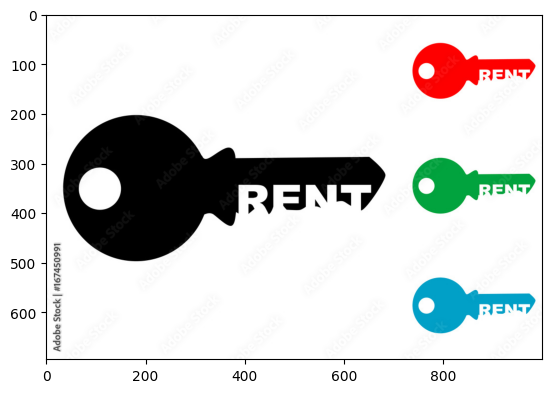

In [14]:
import matplotlib.image as mpimg
import matplotlib.pylab as plt
im=mpimg.imread(path+'llaves.jpg')
plt.imshow(im)

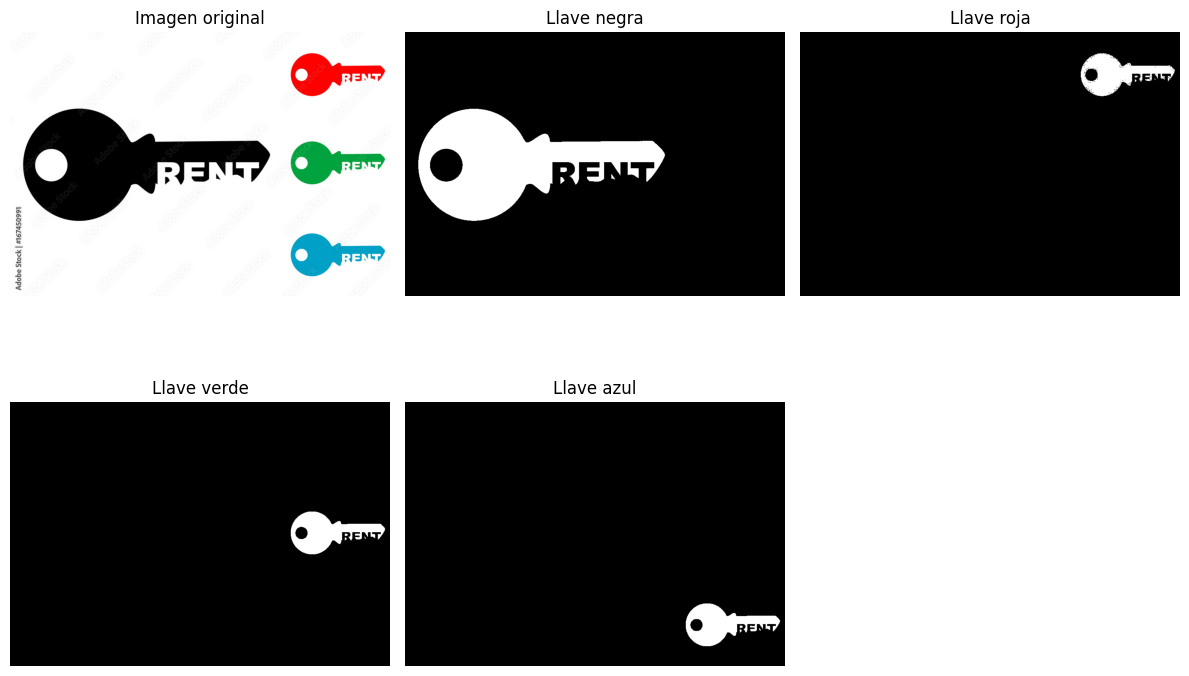

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leer la imagen
image = cv2.imread(path+"llaves.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Crear una lista para guardar las máscaras y los resultados
key_masks = []

# Definir rangos de colores para las llaves en formato HSV
color_ranges = {
    "negra": ([0, 0, 0], [180, 255, 50]),  # Rango para llave negra
    "roja": ([0, 120, 70], [10, 255, 255]),  # Rango para llave roja
    "verde": ([40, 50, 50], [80, 255, 255]),  # Rango para llave verde
    # "azul": ([100, 50, 50], [140, 255, 255])  # Rango para llave azul
    "azul": ([90, 50, 50], [100, 255, 255])   # Rango secundario para tonos más oscuros de azul
}

# Procesar cada llave según el rango de color
for key, (lower, upper) in color_ranges.items():
    lower = np.array(lower, dtype=np.uint8)
    upper = np.array(upper, dtype=np.uint8)

    # Crear una máscara binaria para el color específico
    mask = cv2.inRange(image_hsv, lower, upper)

    # Convertir la máscara a blanco y negro para la llave
    key_image_binary = np.zeros_like(mask)
    key_image_binary[mask > 0] = 255  # Llave en blanco, fondo en negro

    key_masks.append((key, key_image_binary))

# Visualizar los resultados
plt.figure(figsize=(12, 8))

# Imagen original
plt.subplot(2, 3, 1)
plt.title("Imagen original")
plt.imshow(image_rgb)
plt.axis("off")

# Mostrar cada llave procesada
for i, (key, mask) in enumerate(key_masks):
    plt.subplot(2, 3, i + 2)
    plt.title(f"Llave {key}")
    plt.imshow(mask, cmap="gray")
    plt.axis("off")

plt.tight_layout()
plt.show()


## Ejercicio 2

Diseña una clase que acepte una imagen en formato RGB y aplique manualmente las siguientes transformaciones:
1. Conversión de RGB a HSV.
2. Conversión de RGB a CMYK.

In [16]:
import numpy as np

class ColorTransformer:
    def __init__(self, image_rgb):
        self.image_rgb = image_rgb / 255.0  # Normalizar los valores entre 0 y 1

    def rgb_to_hsv(self):
        r, g, b = self.image_rgb[..., 0], self.image_rgb[..., 1], self.image_rgb[..., 2]
        c_max = np.max(self.image_rgb, axis=-1)
        c_min = np.min(self.image_rgb, axis=-1)
        delta = c_max - c_min

        # Calcular el Hue
        hue = np.zeros_like(c_max)
        mask = (c_max == r)
        hue[mask] = (60 * ((g[mask] - b[mask]) / delta[mask]) % 360)
        mask = (c_max == g)
        hue[mask] = (60 * ((b[mask] - r[mask]) / delta[mask]) + 120)
        mask = (c_max == b)
        hue[mask] = (60 * ((r[mask] - g[mask]) / delta[mask]) + 240)
        hue[delta == 0] = 0  # Cuando delta es 0, Hue es indefinido

        # Calcular la Saturación
        saturation = np.zeros_like(c_max)
        saturation[c_max != 0] = delta[c_max != 0] / c_max[c_max != 0]

        value = c_max

        hsv_image = np.stack([hue, saturation, value], axis=-1)
        return hsv_image

    def rgb_to_cmyk(self):
        r, g, b = self.image_rgb[..., 0], self.image_rgb[..., 1], self.image_rgb[..., 2]

        # Calcular los componentes CMY
        c = 1 - r
        m = 1 - g
        y = 1 - b

        # Calcular el componente K
        k = np.minimum(c, np.minimum(m, y))
        c = (c - k) / (1 - k + 1e-10)  # Evitar división por 0
        m = (m - k) / (1 - k + 1e-10)
        y = (y - k) / (1 - k + 1e-10)

        cmyk_image = np.stack([c, m, y, k], axis=-1)
        return cmyk_image


<ipython-input-16-8b3ed6db024d>:16: RuntimeWarning: invalid value encountered in divide
  hue[mask] = (60 * ((g[mask] - b[mask]) / delta[mask]) % 360)
<ipython-input-16-8b3ed6db024d>:18: RuntimeWarning: invalid value encountered in divide
  hue[mask] = (60 * ((b[mask] - r[mask]) / delta[mask]) + 120)
<ipython-input-16-8b3ed6db024d>:20: RuntimeWarning: invalid value encountered in divide
  hue[mask] = (60 * ((r[mask] - g[mask]) / delta[mask]) + 240)


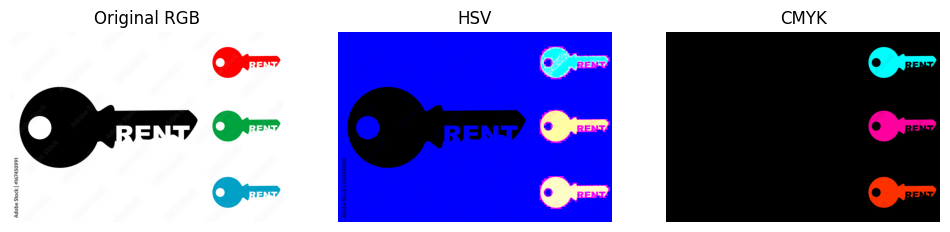

In [17]:
from matplotlib import pyplot as plt
from matplotlib.image import imread

# Cargar la imagen en formato RGB
image_rgb = imread(path+'llaves.jpg')

# Crear una instancia de la clase
transformer = ColorTransformer(image_rgb)

# Conversión a HSV
hsv_image = transformer.rgb_to_hsv()

# Conversión a CMYK
cmyk_image = transformer.rgb_to_cmyk()

# Visualizar resultados
plt.figure(figsize=(12, 8))
plt.subplot(131), plt.imshow(image_rgb), plt.title("Original RGB"), plt.axis("off")
plt.subplot(132), plt.imshow(hsv_image), plt.title("HSV"), plt.axis("off")
plt.subplot(133), plt.imshow(cmyk_image[..., :3]), plt.title("CMYK"), plt.axis("off")
plt.show()


## Ejercicio 3
Desarrolla una clase que acepte una imagen y realice las siguientes transformaciones de forma manual:

1. Escalado de la imagen.
2. Cambio de tamaño de la imagen.



In [18]:
import cv2

class ImageTransformer:
    def __init__(self, image):

        self.image = image

    def scale_image(self, scale_factor):
        new_width = int(self.image.shape[0] * scale_factor)
        new_height = int(self.image.shape[1] * scale_factor)
        scaled_image = cv2.resize(self.image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
        return scaled_image

    def resize_image(self, width, height):
        resized_image = cv2.resize(self.image, (width, height), interpolation=cv2.INTER_LINEAR)
        return resized_image


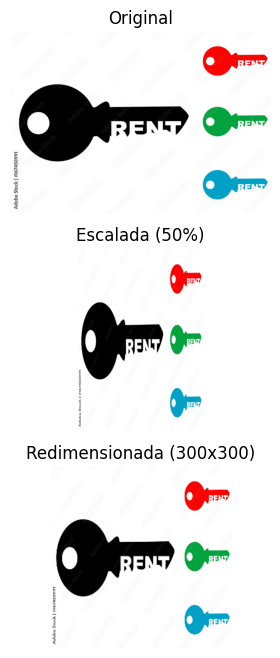

In [19]:
# Cargar la imagen
image = imread(path+'llaves.jpg')

# Crear una instancia de la clase
transformer = ImageTransformer(image)

# Escalar la imagen
scaled_image = transformer.scale_image(0.5)

# Cambiar el tamaño de la imagen
resized_image = transformer.resize_image(300, 300)

# Visualizar resultados
plt.figure(figsize=(12, 8))
plt.subplot(311), plt.imshow(image), plt.title("Original"), plt.axis("off")
plt.subplot(312), plt.imshow(scaled_image), plt.title("Escalada (50%)"), plt.axis("off")
plt.subplot(313), plt.imshow(resized_image), plt.title("Redimensionada (300x300)"), plt.axis("off")
plt.show()


## Ejercicio 4

Reproduce los procesos enseñados en clase utilizando la biblioteca [Opencv](https://docs.opencv.org/4.x/d2/d96/tutorial_py_table_of_contents_imgproc.html). Aplica las mismas transformaciones usando las funciones proporcionadas por la librería.)


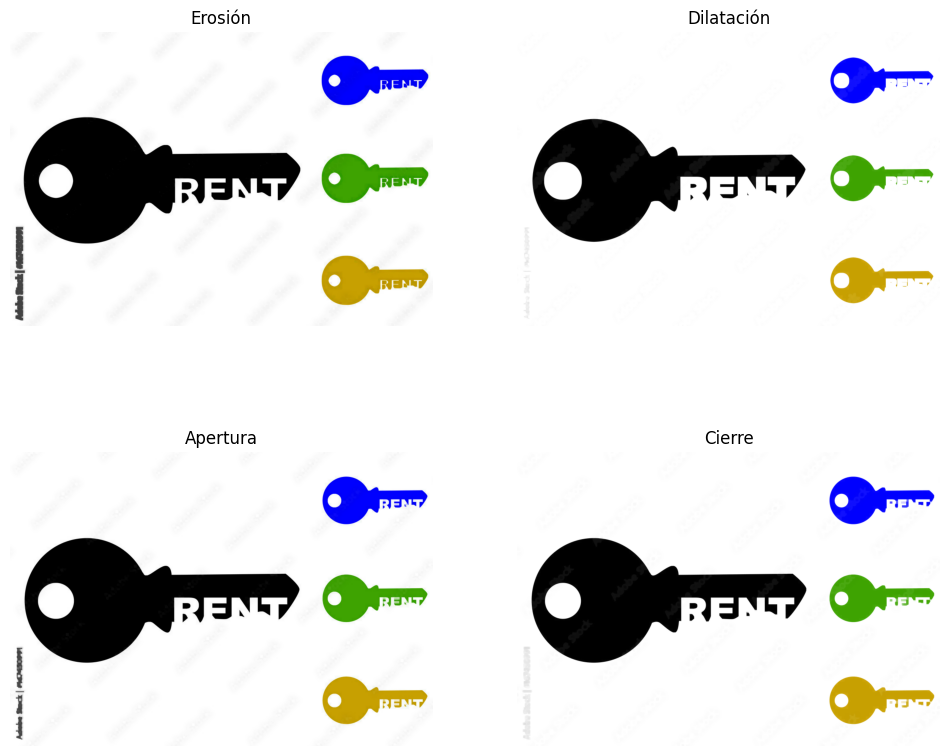

In [20]:
binary_image = cv2.imread(path+"llaves.jpg")

# Crear un kernel (elemento estructurante)
kernel = np.ones((5, 5), np.uint8)  # Tamaño del kernel 5x5

# Aplicar erosión
erosion = cv2.erode(binary_image, kernel, iterations=1)

# Aplicar dilatación
dilation = cv2.dilate(binary_image, kernel, iterations=1)

# Aplicar apertura (erosión seguida de dilatación)
opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

# Aplicar cierre (dilatación seguida de erosión)
closing = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Visualizar los resultados
plt.figure(figsize=(12, 10))
plt.subplot(221), plt.imshow(erosion, cmap='gray'), plt.title("Erosión"), plt.axis("off")
plt.subplot(222), plt.imshow(dilation, cmap='gray'), plt.title("Dilatación"), plt.axis("off")
plt.subplot(223), plt.imshow(opening, cmap='gray'), plt.title("Apertura"), plt.axis("off")
plt.subplot(224), plt.imshow(closing, cmap='gray'), plt.title("Cierre"), plt.axis("off")
plt.show()


## Ejercicio 5

Crea una clase que reciba una imagen binaria y que cuente con métodos para realizar las operaciones morfológicas que se han visto en clase.


In [21]:
class operaciones_morfologicas:

  def __init__(self, image):
    self.image = image

  def manual_erosion(self, image, struct_element):
      rows, cols = image.shape
      struct_rows, struct_cols = struct_element.shape
      result = image.copy()#np.zeros(image.shape)

      struct_center_row, struct_center_col = struct_rows // 2, struct_cols // 2

      for i in range(struct_center_row, rows - struct_center_row):
          for j in range(struct_center_col, cols - struct_center_col):
              roi = image[i - struct_center_row: i + struct_center_row + 1,
                          j - struct_center_col: j + struct_center_col + 1]


              if np.all(roi*struct_element):
                  result[i, j] = 1#roi.max()
              else:
                  result[i, j] = 0#roi.min()

      return result

  def manual_dilation(self, image, struct_element):
        rows, cols = image.shape
        struct_rows, struct_cols = struct_element.shape
        result = image.copy()#np.zeros(image.shape)

        struct_center_row, struct_center_col = struct_rows // 2, struct_cols // 2

        for i in range(struct_center_row, rows - struct_center_row):
            for j in range(struct_center_col, cols - struct_center_col):
                roi = image[i - struct_center_row: i + struct_center_row + 1,
                            j - struct_center_col: j + struct_center_col + 1]


                if np.any(roi*struct_element):
                    result[i, j] = 1#roi.max()
                else:
                    result[i, j] = 0#roi.min()

        return result

  def manual_opening(self, image, struct_element):
        return self.manual_dilation(self.manual_erosion(image, struct_element), struct_element)

  def manual_closing(self, image, struct_element):
        return self.manual_erosion(self.manual_dilation(image, struct_element), struct_element)




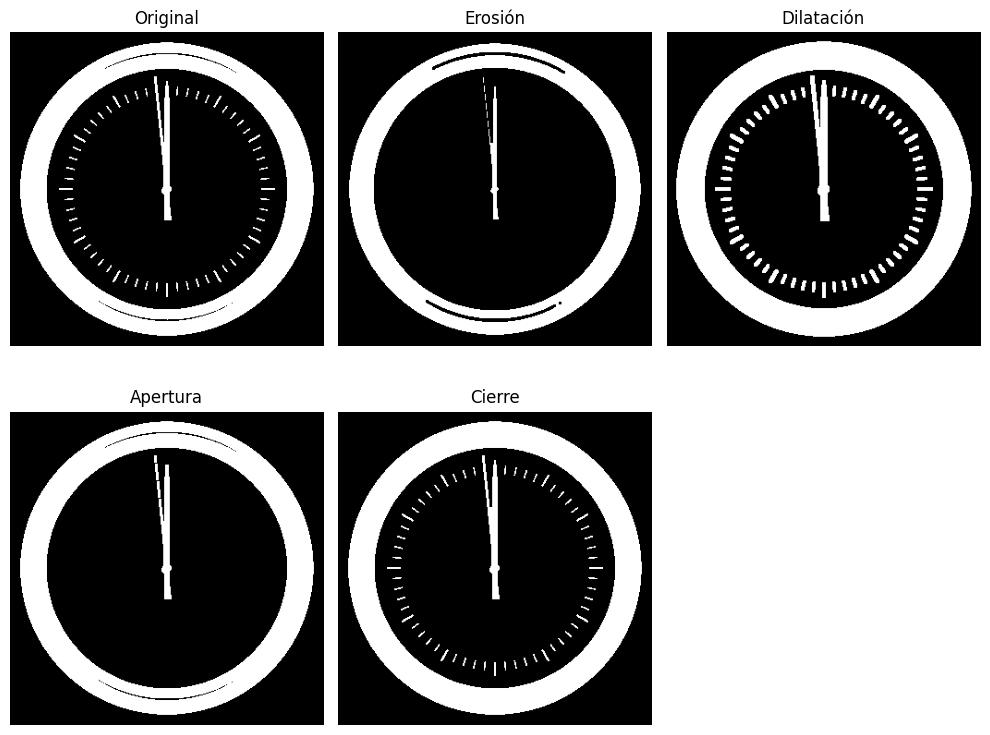

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# # Definir una imagen binaria de ejemplo
# binary_image = np.array([[0, 0, 0, 0, 0],
#                          [0, 1, 1, 1, 0],
#                          [0, 1, 1, 1, 0],
#                          [0, 1, 1, 1, 0],
#                          [0, 0, 0, 0, 0]], dtype=np.uint8)

binary_image = rgb2gray(imread(path+'clock2.jpg'))
binary_image[binary_image <= 0.5] = 0 # create binary image with fixed threshold 0.5
binary_image[binary_image > 0.5] = 1

# Definir un elemento estructurante
struct_element = np.array([[1, 1, 1],
                           [1, 1, 1],
                           [1, 1, 1]], dtype=np.uint8)

# Crear una instancia de la clase
morph_operations = operaciones_morfologicas(binary_image)

# Aplicar erosión
eroded_image = morph_operations.manual_erosion(binary_image, struct_element)

# Aplicar dilatación
dilated_image = morph_operations.manual_dilation(binary_image, struct_element)

# Aplicar apertura
opened_image = morph_operations.manual_opening(binary_image, struct_element)

# Aplicar cierre
closed_image = morph_operations.manual_closing(binary_image, struct_element)

# Visualizar resultados
plt.figure(figsize=(10, 8))

# Imagen original
plt.subplot(2, 3, 1)
plt.title("Original")
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

# Imagen erosionada
plt.subplot(2, 3, 2)
plt.title("Erosión")
plt.imshow(eroded_image, cmap='gray')
plt.axis('off')

# Imagen dilatada
plt.subplot(2, 3, 3)
plt.title("Dilatación")
plt.imshow(dilated_image, cmap='gray')
plt.axis('off')

# Imagen apertura
plt.subplot(2, 3, 4)
plt.title("Apertura")
plt.imshow(opened_image, cmap='gray')
plt.axis('off')

# Imagen cierre
plt.subplot(2, 3, 5)
plt.title("Cierre")
plt.imshow(closed_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
